In [1]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [107]:
# importing libraries
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import nltk
from sklearn.preprocessing import LabelEncoder   # for encoding target variable
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading file
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df = df.iloc[:,:2]

In [4]:
df.shape

(5572, 2)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# rename columns
df = df.rename(columns = {'v1': 'target', 'v2': 'text'})
df.sample(5)

,target,text
885,ham,Gibbs unsold.mike hussey
3584,ham,Heart is empty without love.. Mind is empty wi...
2247,spam,Back 2 work 2morro half term over! Can U C me ...
953,ham,Also remember to get dobby's bowl from your car
3455,ham,Ok. I.ll do you right later.


In [8]:
# encoding target variable
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
5073,0,I want to sent &lt;#&gt; mesages today. Thats...
4891,0,Miserable. They don't tell u that the side eff...
972,0,Yup i thk so until e shop closes lor.
1620,0,"Fuck babe, I miss you sooooo much !! I wish yo..."
349,0,Just checking in on you. Really do miss seeing...


ham: 0

spam: 1

In [9]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')

## 2. EDA

In [12]:
# value counts
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

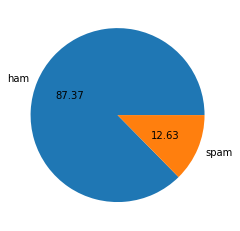

In [13]:
# plotting pie chart
plt.pie(df['target'].value_counts(),   
        labels = ['ham','spam'],   # legend
        autopct = "%0.2f")   # to display percent value
plt.show()

Data is imbalanced.

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/amanbhatt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# number of characters in each text
df['num_characters'] = df['text'].apply(len)

# number of words in each text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# number of sentences in each text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [17]:
# describe
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [18]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


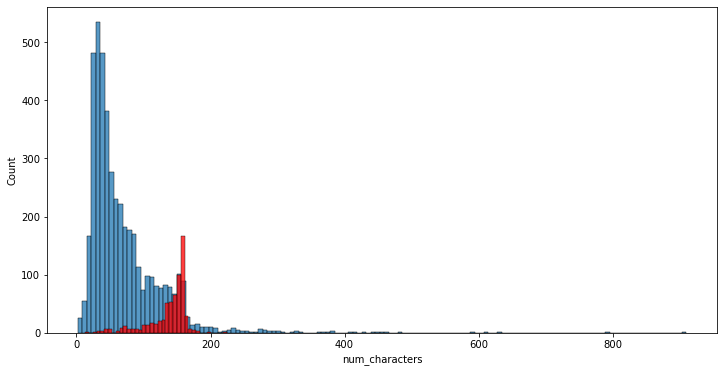

In [20]:
# figure size
plt.figure(figsize=(12,6))

# histplot for number of characters
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

plt.show()

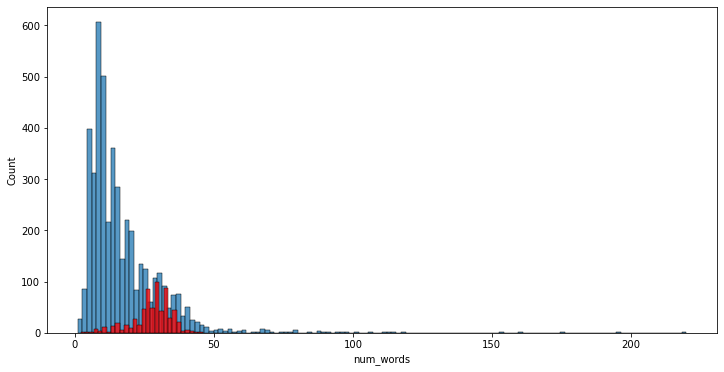

In [21]:
# figure size
plt.figure(figsize=(12,6))

# histplot for number of words
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

plt.show()

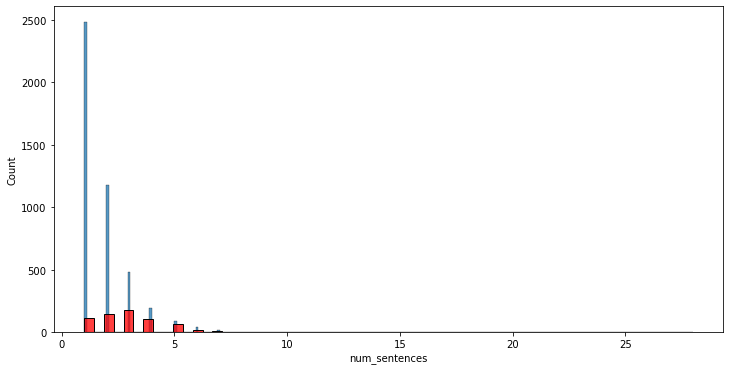

In [22]:
# figure size
plt.figure(figsize=(12,6))

# histplot for number of sentences
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

plt.show()

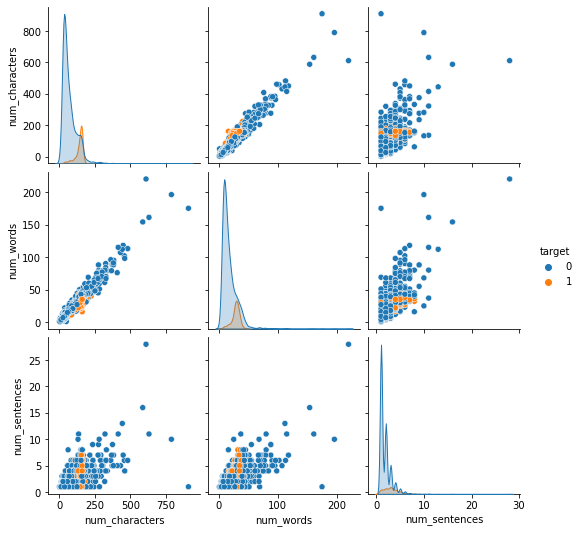

In [23]:
sns.pairplot(df, hue='target')
plt.show()

<AxesSubplot:>

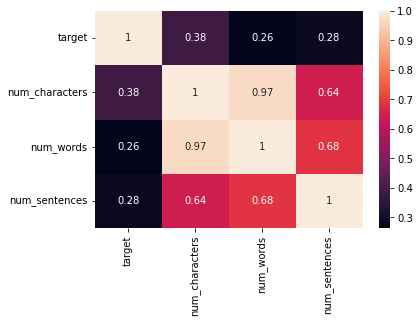

In [24]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [25]:
def transform_text(text):
    """ Function to perform data preprocessing """
    
    # lower the text
    text = text.lower()
    
    # word tokenization
    text = nltk.word_tokenize(text)
    
    # fetching alpha numeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # clear y
    text = y[:]
    y.clear()
    
    # fetching words that are not stopwords and that are not punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # clear y
    text = y[:]
    y.clear()
    
    # stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    # converting list to string
    return " ".join(y)

In [26]:
# applying above function
df['transformed_text'] = df['text'].apply(transform_text)

In [27]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
628,1,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,130,26,2,new textbuddi chat 2 horni guy ur area 4 25p f...
3343,0,Oh great. I.ll disturb him more so that we can...,52,13,2,oh great disturb talk
5163,0,Ok leave no need to ask,23,6,1,ok leav need ask
871,0,Its going good...no problem..but still need li...,102,18,1,go good problem still need littl experi unders...
4382,0,No need lar i go engin? Cos my sis at arts tod...,51,14,2,need lar go engin co si art today


In [28]:
# creating object of WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

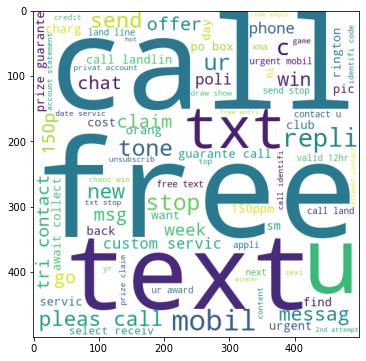

In [29]:
# generate wordcloud for spam messages 

# fetching string and concatenate and seperate by space
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

# figure size
plt.figure(figsize=(15,6))

# display wordcloud
plt.imshow(spam_wc)

plt.show()

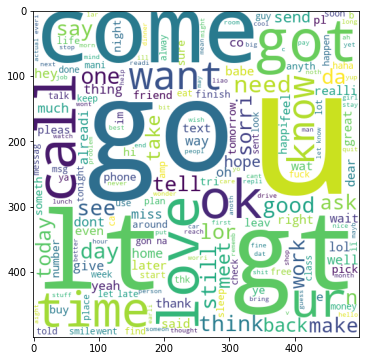

In [30]:
# generate wordcloud for ham messages 

# fetching string and concatenate and seperate by space
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

# figure size
plt.figure(figsize=(15,6))

# display wordcloud
plt.imshow(ham_wc)

plt.show()

In [32]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [39]:
# words that are coming maximum times in spam messages

spam = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():   # splitting every word
        spam.append(word)

In [42]:
spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [48]:
# most frequent 30 words
spam_counter = pd.DataFrame(Counter(spam).most_common(30))
spam_counter.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


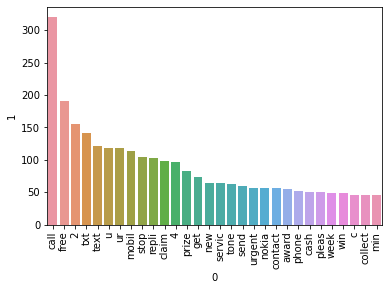

In [55]:
# plotting most frequent 30 words in spam
sns.barplot(spam_counter[0], spam_counter[1])

# rotating the x-axis feature to vertical
plt.xticks(rotation = 'vertical')

plt.show()

In [60]:
# words that are coming maximum times in ham messages

ham = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():   # splitting every word
        ham.append(word)

In [61]:
ham

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [62]:
# most frequent 30 words
ham_counter = pd.DataFrame(Counter(ham).most_common(30))
ham_counter.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


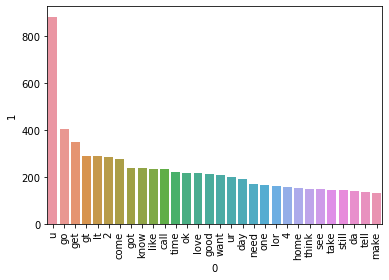

In [63]:
# plotting most frequent 30 words in ham
sns.barplot(ham_counter[0], ham_counter[1])

# rotating the x-axis feature to vertical
plt.xticks(rotation = 'vertical')

plt.show()

## 4. Model Building

Naive Bayes works better on textual data

In [67]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
4561,0,How much u trying to get?,25,7,1,much u tri get
3135,0,Can you let me know details of fri when u find...,104,24,2,let know detail fri u find co tom mention chin...
2371,0,"Hmm, too many of them unfortunately... Pics ob...",88,18,2,hmm mani unfortun pic obvious arent hot cake k...
79,0,Its not the same here. Still looking for a job...,76,20,3,still look job much ta earn
3087,0,"'Wnevr i wana fal in luv vth my books, My bed ...",155,40,3,wana fal luv vth book bed fal luv vth yen mado...


In [96]:
# Vectorization

# CountVectorizer that using bag of words
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [97]:
# Features
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)
X

(5169, 3000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
# Target
y = df['target'].values
print(y.shape)
y

(5169,)


array([0, 0, 1, ..., 0, 0, 0])

In [99]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [100]:
# creating instances
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Model 1

In [101]:
# fitting
gnb.fit(X_train, y_train)

# predicting
y_pred1 = gnb.predict(X_test)

# Accuracy
print("Gaussian Naive Bayes scores: \n")
print("Accuracy test: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))

Gaussian Naive Bayes scores: 

Accuracy test:  0.8694390715667312
Confusion Matrix: 
 [[788 108]
 [ 27 111]]
Precision Score:  0.5068493150684932


### Model 2

In [102]:
# fitting
mnb.fit(X_train, y_train)

# predicting
y_pred2 = mnb.predict(X_test)

# Accuracy
print("Multinomial Naive Bayes scores: \n")
print("Accuracy test: ", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred2))
print("Precision Score: ", precision_score(y_test,y_pred2))

Multinomial Naive Bayes scores: 

Accuracy test:  0.9709864603481625
Confusion Matrix: 
 [[896   0]
 [ 30 108]]
Precision Score:  1.0


### Model 3

In [103]:
# fitting
bnb.fit(X_train, y_train)

# predicting
y_pred3 = bnb.predict(X_test)

# Accuracy
print("Bernoulli Naive Bayes scores: \n")
print("Accuracy test: ", accuracy_score(y_test,y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred3))
print("Precision Score: ", precision_score(y_test,y_pred3))

Bernoulli Naive Bayes scores: 

Accuracy test:  0.9835589941972921
Confusion Matrix: 
 [[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


 Chosing mnb using tfidf as precision is more important in this case

### Various Models

In [108]:
# using different models and creating instances
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [110]:
# dictionary for different models used
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [111]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    """ This function takes different classifiers and return accuracy and precision """
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [114]:
# accuracy and precision for all classifiers

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - \n",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision - 
 0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision - 
 1.0
For  NB
Accuracy -  0.9709864603481625
Precision - 
 1.0
For  DT
Accuracy -  0.9294003868471954
Precision - 
 0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision - 
 0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision - 
 0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision - 
 0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision - 
 0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision - 
 0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision - 
 0.92
[11:34:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.971953578336557
Precision - 
 0.943089430894309


In [116]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


Naive Bayes is performing well.


On scaling precision becomes low.

Tried voting classifier but precision goes down.

In [118]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))